In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path
# from bqplot import pyplot as plt

%matplotlib inline

In [2]:
data_dir = Path("HAWC_DATA/2016/")

In [3]:
df1 = pd.read_csv(data_dir / 'R1_2016.dat', delimiter='\t', header=None, skiprows=2, engine='python')
df2 = pd.read_csv(data_dir / 'M2_2016.dat', delimiter='\t', header=None, skiprows=2, engine='python')
df3 = pd.read_csv(data_dir / 'M3_2016.dat', delimiter='\t', header=None, skiprows=2, engine='python')
df4 = pd.read_csv(data_dir / 'M4_2016.dat', delimiter='\t', header=None, skiprows=2, engine='python')

In [4]:
df1.columns = df2.columns = df3.columns = df4.columns = ['Time(day_no)','Pressure(hPa)','Eff_Cor_rate(counts)','Pre_Cor_rate(%)','DA_remov_smooth(%)']

In [5]:
df1['Time(day_no)'] = pd.to_datetime(df1['Time(day_no)'], unit='D', origin=pd.Timestamp('2016-01-01'))
df2['Time(day_no)'] = pd.to_datetime(df2['Time(day_no)'], unit='D', origin=pd.Timestamp('2016-01-01'))
df3['Time(day_no)'] = pd.to_datetime(df3['Time(day_no)'], unit='D', origin=pd.Timestamp('2016-01-01'))
df4['Time(day_no)'] = pd.to_datetime(df4['Time(day_no)'], unit='D', origin=pd.Timestamp('2016-01-01'))

In [6]:
df1 = df1.set_index('Time(day_no)')
df2 = df2.set_index('Time(day_no)')
df3 = df3.set_index('Time(day_no)')
df4 = df4.set_index('Time(day_no)')

In [7]:
df3.head()

,Pressure(hPa),Eff_Cor_rate(counts),Pre_Cor_rate(%),DA_remov_smooth(%)
Time(day_no),,,,
2016-01-02 00:00:30.003004800,626.996643,0.0,0.0,-99.989998
2016-01-02 00:01:29.998646400,626.996765,0.0,0.0,-99.989998
2016-01-02 00:02:30.004569600,627.013000,0.0,0.0,-99.989998
2016-01-02 00:03:30.000211200,627.013000,0.0,0.0,-99.989998
2016-01-02 00:04:29.995852800,627.045593,0.0,0.0,-99.989998


In [10]:
list(df1.keys())

['Pressure(hPa)',
 'Eff_Cor_rate(counts)',
 'Pre_Cor_rate(%)',
 'DA_remov_smooth(%)']

In [77]:
def plotting(var):
    max_val = df1[var].max()
    min_val = df1[var].sort_values().drop_duplicates().nsmallest(2).iloc[-1]
    plt.figure(figsize=(21,7))
    for frame in [df1, df2, df3, df4]:
        plt.plot(frame[var], 
                 marker='.', markersize=0.75, 
                 linestyle='', linewidth=0)
    plt.ylim([min_val - 0.5, max_val + 0.5])

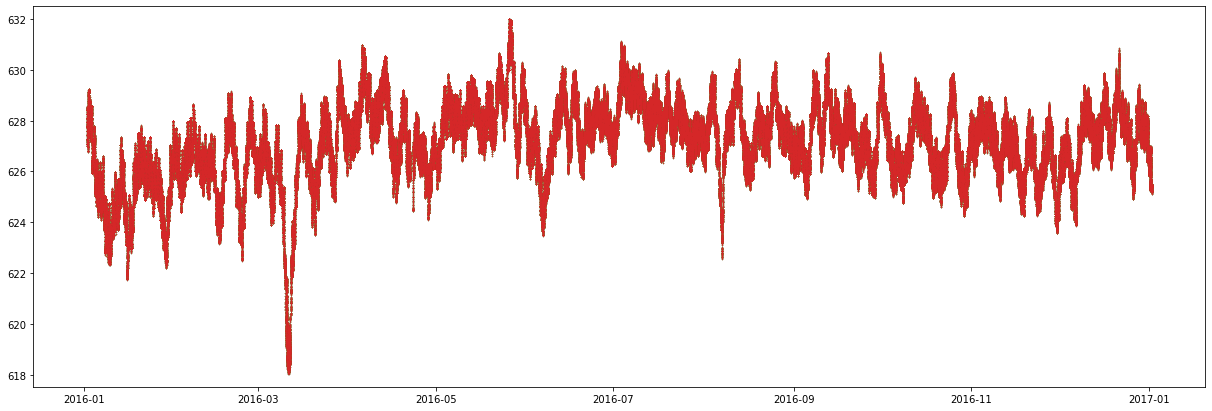

In [80]:
var = df1.keys()[0]
plotting(var)

In [73]:
def plotting(a):
    fig = plt.figure(figsize=(25,5), dpi=100)
    # ax = fig.add_subplot(1, 1, 1)
    plt.plot(df1[a], linewidth=1)
    plt.plot(df2[a], linewidth=1)
    plt.plot(df3[a], linewidth=1)
    plt.plot(df4[a], linewidth=1)
    # ax.plot(df2['DA_remov_smooth(%)'], linewidth=1.5)
    # ax.plot(df3['DA_remov_smooth(%)'], linewidth=0.5)
    # ax.plot(df4['DA_remov_smooth(%)'], linewidth=0.15)
    ax.set_ylim([-1.5, 1.5])

In [28]:
plotting('Pressure(hPa)')

TypeError: cannot unpack non-iterable Figure object

<Figure size 2500x500 with 0 Axes>

## Pause

In [55]:
max_val = df4['Pressure(hPa)'].max() 
max_val

632.0007935

In [56]:
min_val = df1['Pressure(hPa)'].sort_values().drop_duplicates().nsmallest(2).iloc[-1]
min_val

618.0258179

In [24]:
df_temp = df1['Pressure(hPa)'] + df1['DA_remov_smooth(%)'] / 100
df_temp.head()
# df_temp.tail()

Time(day_no)
2016-01-02 00:00:30.003004800    625.996743
2016-01-02 00:01:29.998646400    625.996865
2016-01-02 00:02:30.004569600    626.013101
2016-01-02 00:03:30.000211200    626.013101
2016-01-02 00:04:29.995852800    626.045693
dtype: float64

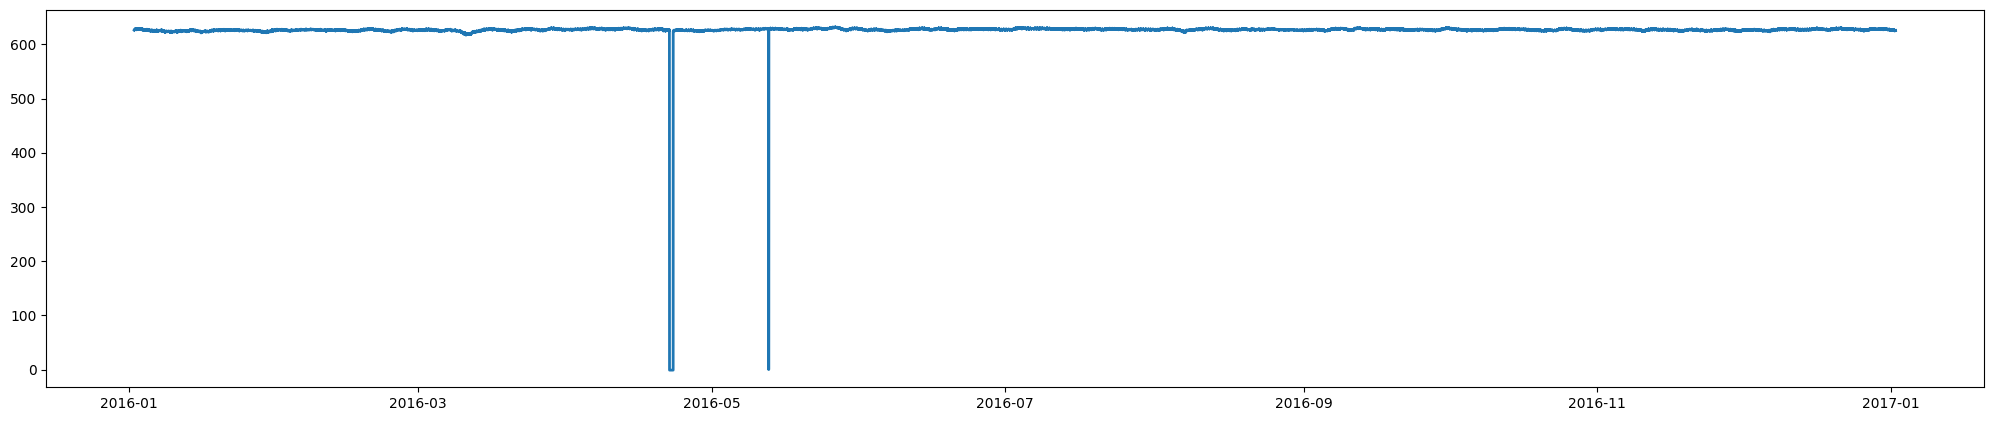

In [25]:
fig = plt.figure(figsize=(25,5), dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_temp, linewidth=2)